# __1. Exploratory Data Anlaysis__

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("/Users/samerre/Downloads/bank-additional/bank-additional-full.csv", sep=";")

In [83]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [84]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [85]:
# Change integer columns to float.
s = df.select_dtypes(include='int64').columns
df[s] = df[s].astype("float64")

In [111]:
# select object features
df_object_0 = df.select_dtypes("object")

# select float features -  for later 
df_float = df.select_dtypes("float64")

In [88]:
# Show each unique value of categorical feature
for col in df_object:
    df_object_unique = df_object[col].unique()
    print(df_object_unique)

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


In [52]:
# New features: senior clients (older than 65 years). Current university Students (between 18 and 25 years on a degree).
df['senior_client'] = np.where(df['age']>=65, 'yes', 'no')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,senior_client
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


In [96]:
# We also need to encode the y variable 
df["y"] = np.where(df["y"] == "yes", 1, 0).astype("float64")

In [55]:
#by consulting the documentation I found out that 999 is a place filler for when a user was not previously contacted. 
#I think that it would be smart to convert this feature to a catergorical one.

df["pdays"].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [56]:
# Basically all of the values are either >27 or 999

df[(df["pdays"]< 980) & (df["pdays"]>25)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,senior_client
40243,24.0,technician,married,professional.course,no,no,no,cellular,jul,fri,...,26.0,1.0,success,-1.7,94.215,-40.3,0.885,4991.6,1.0,no
40874,41.0,technician,married,professional.course,no,no,no,cellular,oct,wed,...,27.0,1.0,success,-1.1,94.601,-49.5,0.959,4963.6,1.0,no


In [57]:
# Create a categorical variable and drop the numerical one.
df["contacted_before"] = np.where(df['pdays']> 28, 'no', 'yes')

df = df.drop("pdays", 1)

In [58]:
# Drop duration as it highly affects output variable y. If duration = 0, y= "no".
df = df.drop("duration", 1)

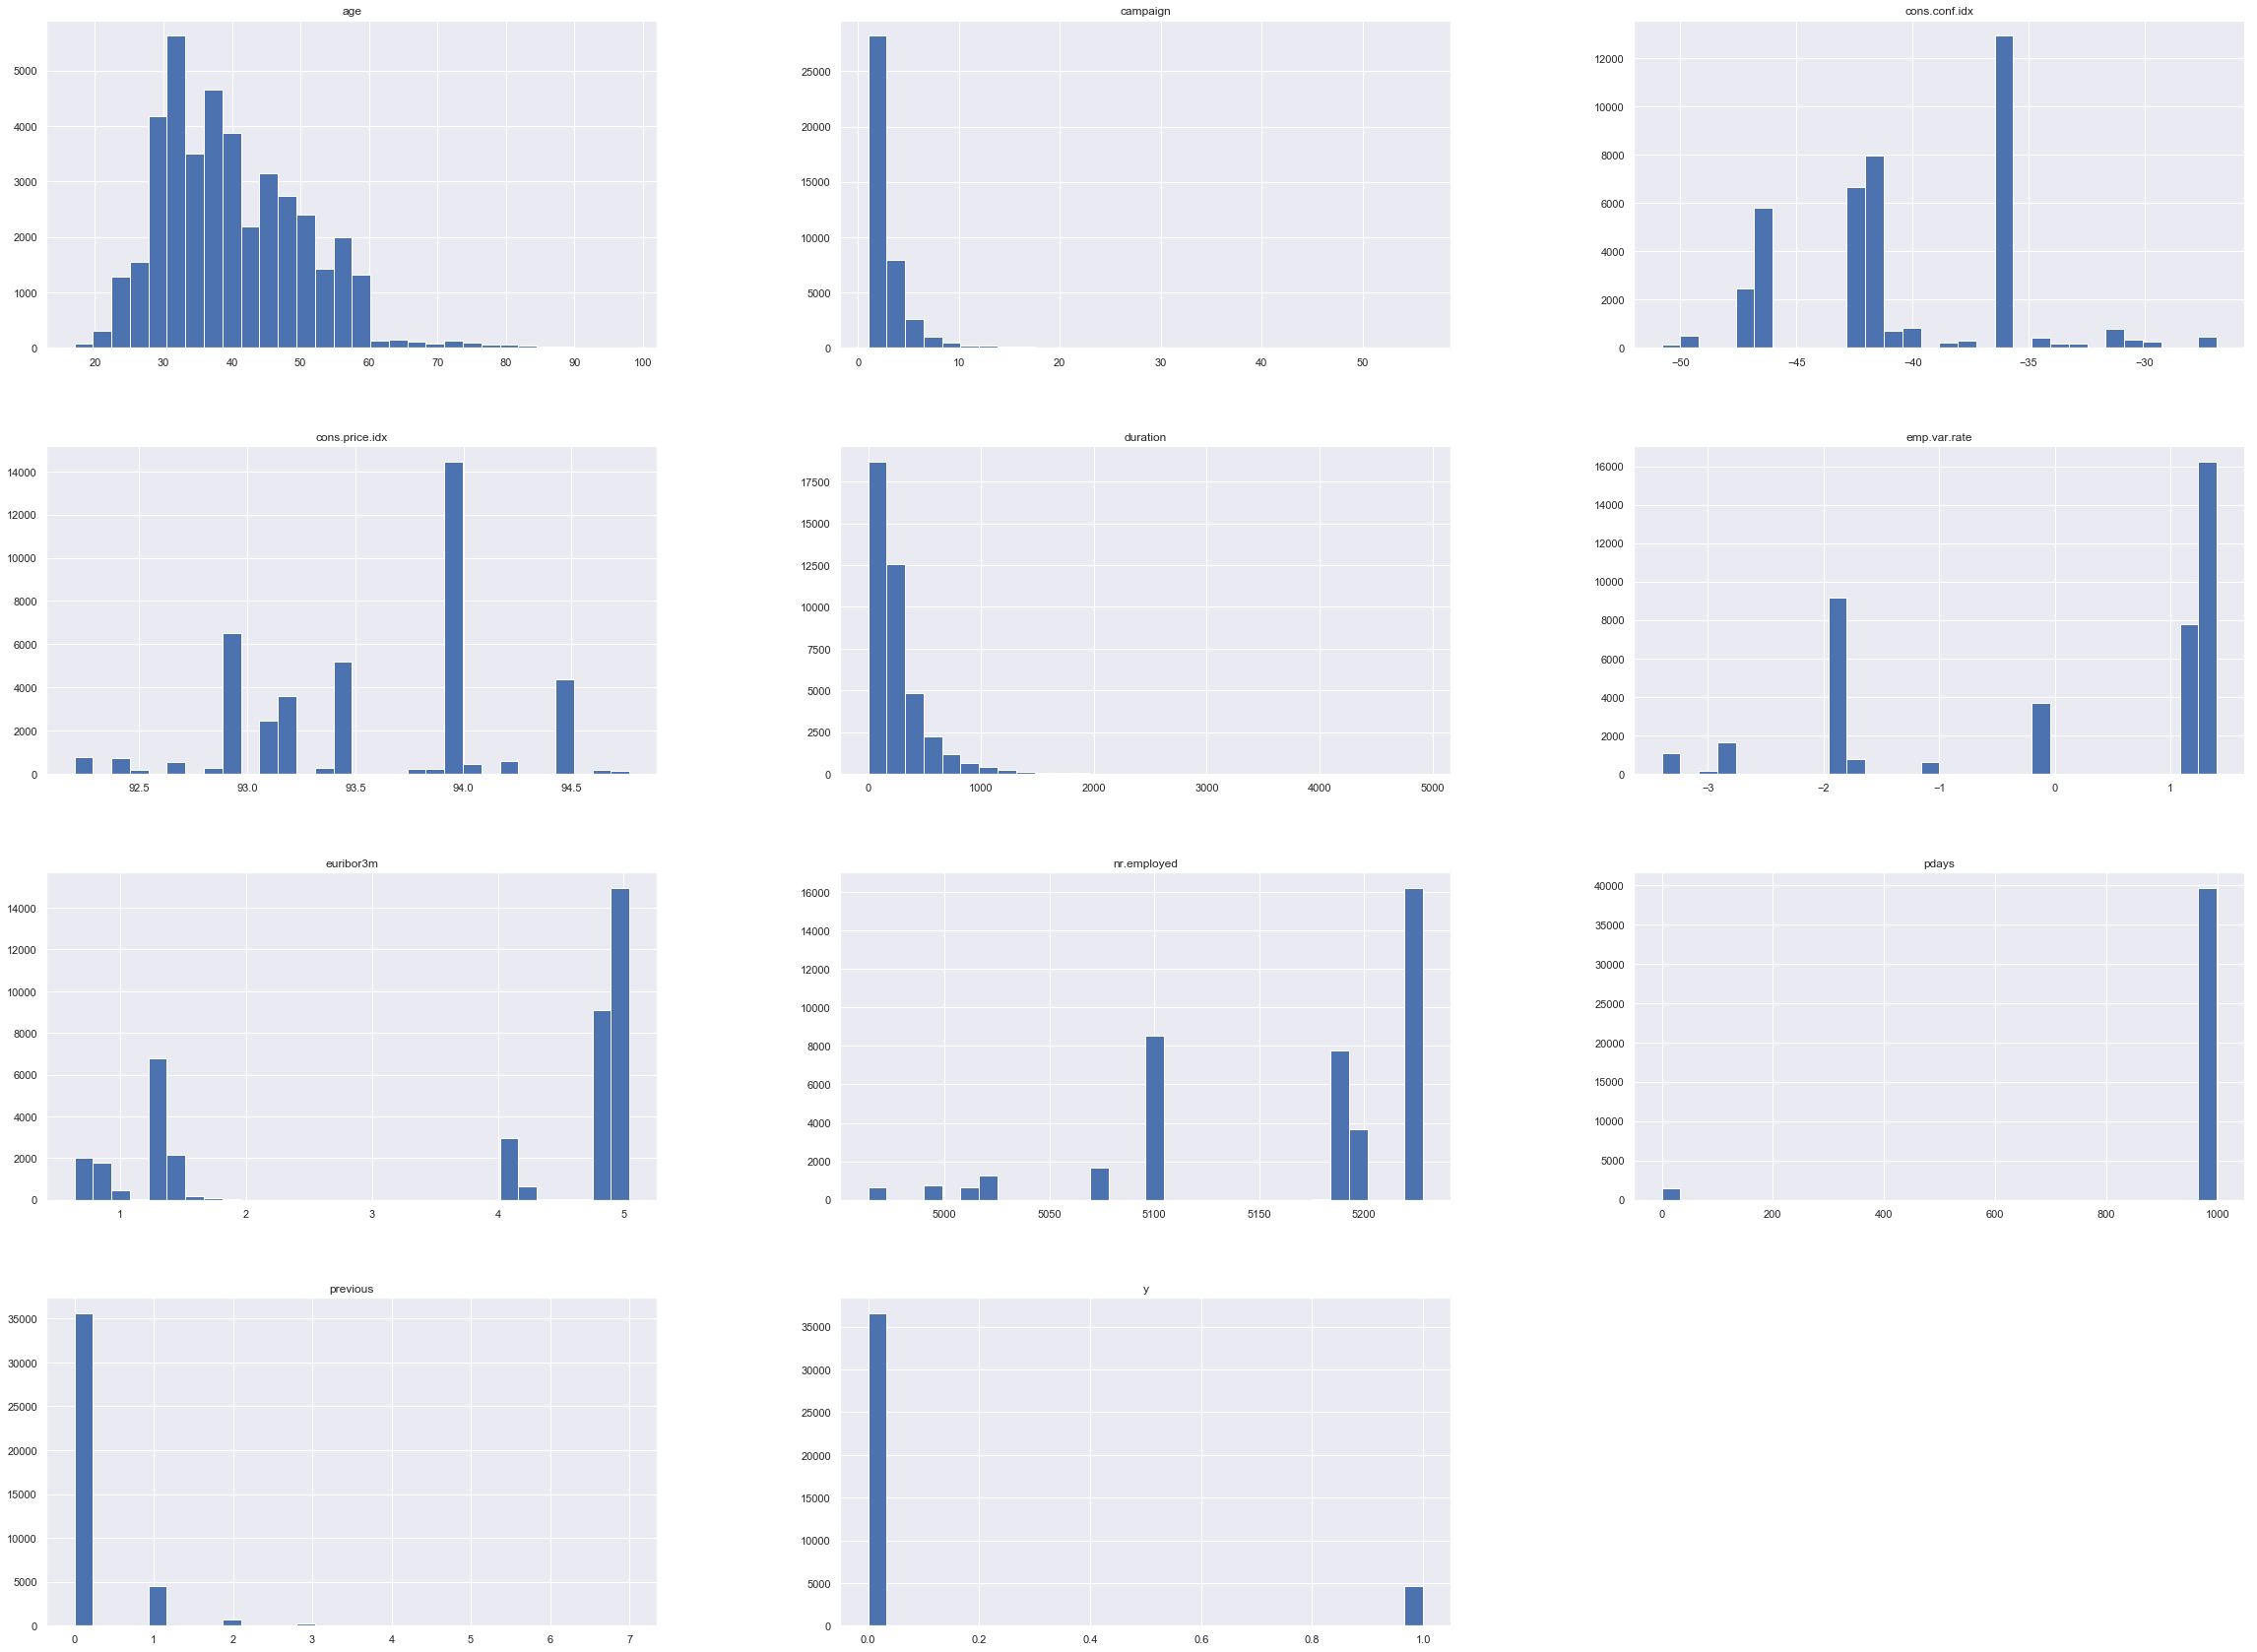

In [54]:
df.hist(bins=30, figsize=(40, 30))
plt.show()

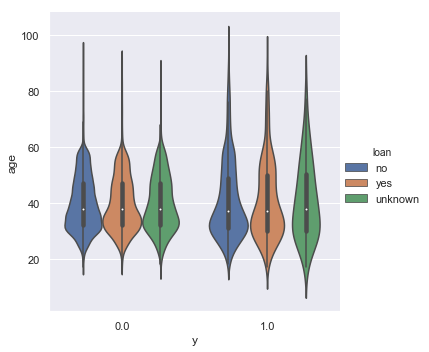

In [59]:
sns.catplot(x="y", y="age", data=df, hue="loan", kind="violin")
sns.set(rc={'figure.figsize':(11.7,8.27)})

<Figure size 1440x720 with 0 Axes>

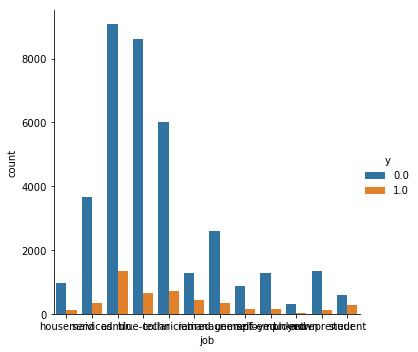

<Figure size 1440x720 with 0 Axes>

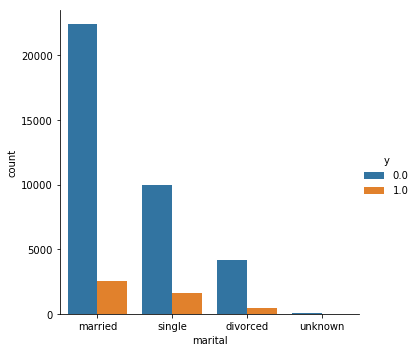

<Figure size 1440x720 with 0 Axes>

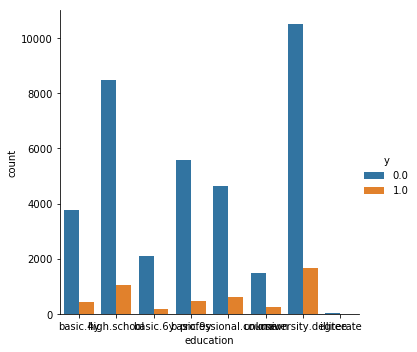

<Figure size 1440x720 with 0 Axes>

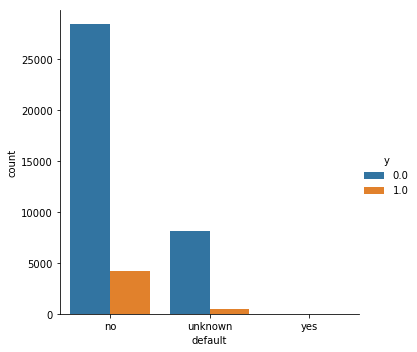

<Figure size 1440x720 with 0 Axes>

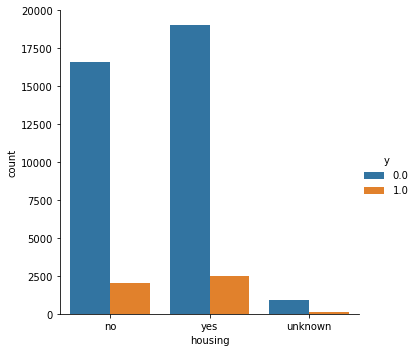

<Figure size 1440x720 with 0 Axes>

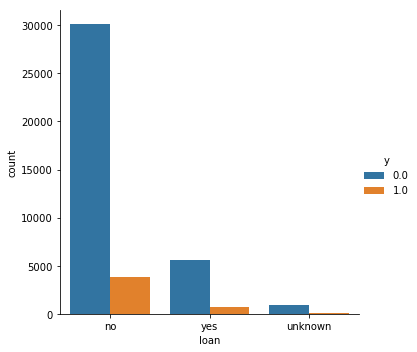

<Figure size 1440x720 with 0 Axes>

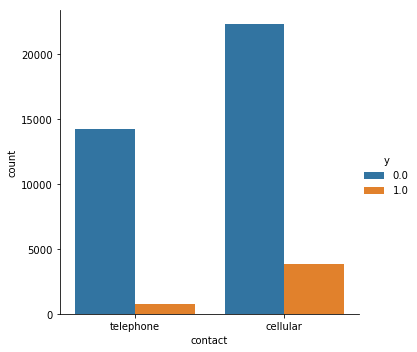

<Figure size 1440x720 with 0 Axes>

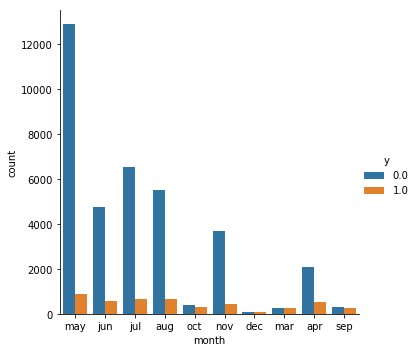

<Figure size 1440x720 with 0 Axes>

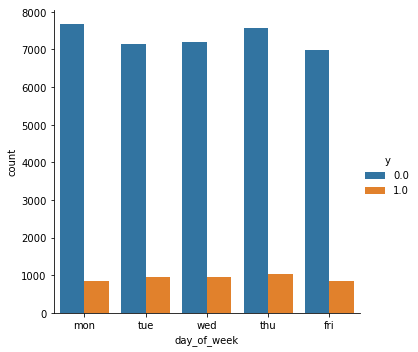

<Figure size 1440x720 with 0 Axes>

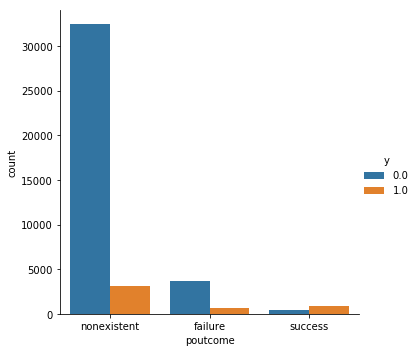

In [121]:
col = df_object.loc[:,"job":"poutcome"].columns

for i in col:
    plt.figure(figsize=(20,10))
    sns.catplot(x=i,data=df, hue="y", kind="count")
    plt.show()

In [61]:
#g = sns.pairplot(df, kind="scatter", hue="y",
              #plot_kws=dict(alpha=0.3))
#g.add_legend()

In [98]:
# select float features -  for later 
df_float = df.select_dtypes("float64")

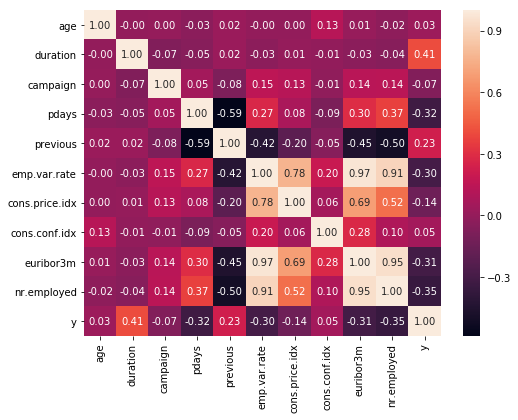

In [103]:
# corr of float features
corr_matrix = df_float.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

If we look at "y" we can conclude that it doesn't seem to significantly correlate with any of the other numerical features.

In [117]:
# PCA is the 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_ohe = pd.get_dummies(df)
df_rescaled = scaler.fit_transform(df_ohe)

# fit PCA
pca = PCA(n_components=50)
pca_scores = pca.fit_transform(df_rescaled)

print('Components shape:', pca.components_.shape)

/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/samerre/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Components shape: (50, 64)


In [63]:
# Perform log transformation on features with a skewed distribution - campaign, previous.
df['log_campaign'] = np.log(df['campaign']+1)
df['log_previous'] = np.log(df['previous']+1)

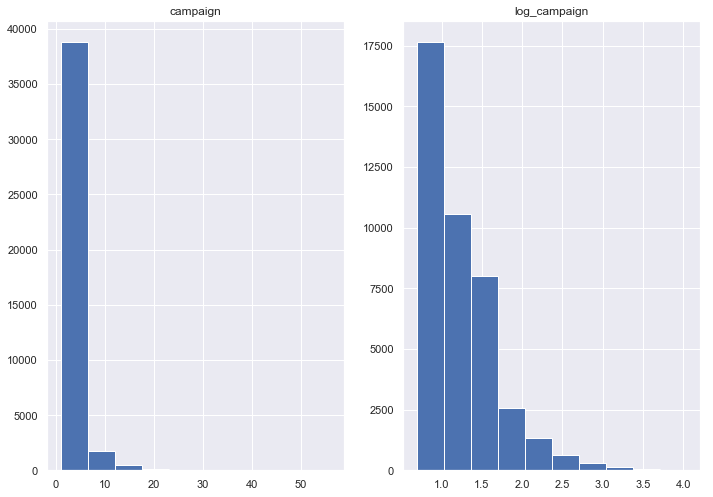

In [64]:
plt.subplot(1, 2, 1)  
df['campaign'].hist()
plt.title('campaign')
plt.subplot(1, 2, 2)  
df['log_campaign'].hist()
plt.title('log_campaign')
plt.show()

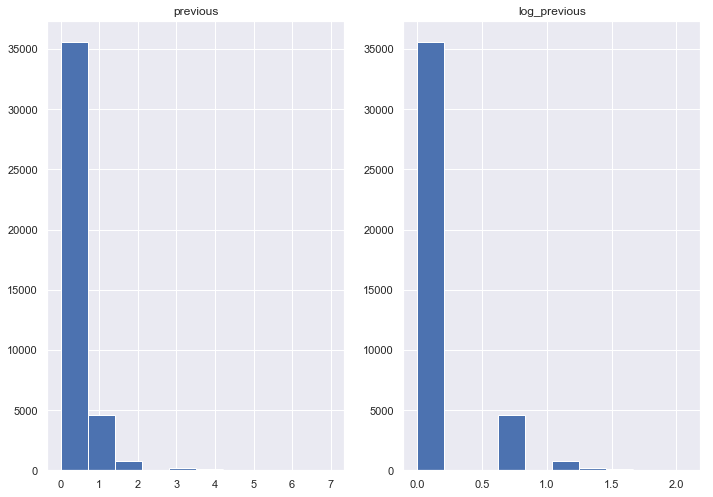

In [65]:
plt.subplot(1, 2, 1)  
df['previous'].hist()
plt.title('previous')
plt.subplot(1, 2, 2)  
df['log_previous'].hist()
plt.title('log_previous')
plt.show()

DOesn't look like the log transformation in both cases really helped a lot hence I will be keep them as they are. 

In [66]:
df= df.drop(["log_previous", "log_campaign"],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age                 41188 non-null float64
job                 41188 non-null object
marital             41188 non-null object
education           41188 non-null object
default             41188 non-null object
housing             41188 non-null object
loan                41188 non-null object
contact             41188 non-null object
month               41188 non-null object
day_of_week         41188 non-null object
campaign            41188 non-null float64
previous            41188 non-null float64
poutcome            41188 non-null object
emp.var.rate        41188 non-null float64
cons.price.idx      41188 non-null float64
cons.conf.idx       41188 non-null float64
euribor3m           41188 non-null float64
nr.employed         41188 non-null float64
y                   41188 non-null float64
senior_client       41188 non-null object
contacted_before    41188 non-null object


In [67]:
df.to_pickle("df.pkl")

In [68]:
# Split to train, test, valid
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df, test_size = 0.2)
df_train, df_test = train_test_split(df_train, test_size = 0.25)

In [69]:
df_train.to_pickle("df_train.pkl")
df_train.shape

(24712, 21)

In [70]:
df_valid.to_pickle("df_valid.pkl")
df_valid.shape

(8238, 21)

In [71]:
df_test.to_pickle("df_test.pkl")
df_test.shape

(8238, 21)